# Model训练脚本

- 作用：**读取训练数据**并**训练神经网络**保存到./model.h5

可尝试修改网络结构以获得更优结果

训练好后将model.h5保存到项目根目录（已有预先模型的模型）

In [2]:
# encoding=utf8  
import os
os.environ['KERAS_BACKEND']='tensorflow'
os.environ['PATH'] = os.environ['PATH']+r";C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v8.0\lib\x64"

In [3]:
import numpy as np
from keras.layers import Conv2D,Dense,Activation,Flatten,MaxPooling2D
from keras.models import Sequential,load_model
import pickle
from PIL import Image,ImageFilter
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import pickle,gzip

Using TensorFlow backend.


In [4]:
#don't change this
resize_ratio = 8
ban=[]

# Data pre-processing

下列三个cell对应功能：

- 处理原始图片并保存到data.pkl.gz
- 读取data.pkl.gz
- 测试

一般情况下执行第二个cell即可

In [5]:
# pack raw data
print('Packing raw data......')

X_train = []
y_train = []

raw_data_location = './rawdata/'
tot=len(os.listdir(raw_data_location))
cur=0

for i in os.listdir(raw_data_location):
    cur+=1
    if cur%100==0:
        print('current/total: '+str(cur)+'/'+str(tot))
    if i[-4:]!='.png':
        continue
    img = Image.open(raw_data_location+i).crop((0, 500, 1080, 1300))
    img = img.resize((img.width/resize_ratio, img.height/resize_ratio), Image.ANTIALIAS)
    img = img.filter(ImageFilter.CONTOUR).convert('L')
    img = np.array(img)/255.0
    X_train.append(img)
    y_train.append([int(i[4:8])/1080.0,(int(i[8:12])-500)/800.0,int(i[12:16])/1080.0,(int(i[16:20])-510)/800.0])

print('Packing......')
f=gzip.open('data.pkl.gz','wb')
X_train = np.array(X_train,dtype='float32').reshape(-1,100,135,1)
y_train = np.array(y_train,dtype='float32').reshape(-1,4)
pickle.dump((X_train,y_train),f)
f.close()
print('Done!')

Packing raw data......
current/total: 100/2503
current/total: 200/2503
current/total: 300/2503
current/total: 400/2503
current/total: 500/2503
current/total: 600/2503
current/total: 700/2503
current/total: 800/2503
current/total: 900/2503
current/total: 1000/2503
current/total: 1100/2503
current/total: 1200/2503
current/total: 1300/2503
current/total: 1400/2503
current/total: 1500/2503
current/total: 1600/2503
current/total: 1700/2503
current/total: 1800/2503
current/total: 1900/2503
current/total: 2000/2503
current/total: 2100/2503
current/total: 2200/2503
current/total: 2300/2503
current/total: 2400/2503
current/total: 2500/2503
Packing......
Done!


In [7]:
f=gzip.open('data.pkl.gz')
X_train,y_train = pickle.load(f)
f.close()

# Build up model

In [7]:
model = load_model('../model.h5')
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 135, 48)      1776      
_________________________________________________________________
activation_1 (Activation)    (None, 100, 135, 48)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 68, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 68, 64)        76864     
_________________________________________________________________
activation_2 (Activation)    (None, 50, 68, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 68, 64)        102464    
_________________________________________________________________
activation_3 (Activation)    (None, 50, 68, 64)        0         
__________

In [5]:
## build Network
model = Sequential()

model.add(Conv2D(
                        batch_input_shape=(None, 100,135, 1),
                        filters=48,
                        kernel_size=6,
                        strides=1,
                        padding='same',
                        ))
model.add(Activation('relu'))
model.add(MaxPooling2D(
                       pool_size=2,
                       padding='same',
                       ))

for i in range(3):
    model.add(Conv2D(
                            filters=64,
                            kernel_size=5,
                            strides=1,
                            padding='same',
                            ))
    model.add(Activation('relu'))

model.add(MaxPooling2D(
                       pool_size=2,
                       padding='same',
                       ))

model.add(Conv2D(
                        filters=64,
                        kernel_size=5,
                        strides=1,
                        padding='same',
                        ))
model.add(Activation('relu'))
model.add(MaxPooling2D(
                       pool_size=2,
                       padding='same',
                       ))



model.add(Flatten())

# model.add(Dense(512))
# model.add(Activation('relu'))

# model.add(Dense(128))
# model.add(Activation('relu'))

# model.add(Dense(16))
# model.add(Activation('relu'))

#model.add(Dense(8))
#model.add(Activation('relu'))

model.add(Dense(4))
model.add(Activation('sigmoid'))

# We add metrics to get more results you want to see
model.compile(optimizer='adam',
              loss='mse'
              )

# Train

In [44]:
print('Training ------------')
model.fit(X_train[:-10], y_train[:-10], epochs=24, batch_size=24)

Training ------------


ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 364 arrays: [array([[ 0.90588235,  0.90588235,  0.90588235, ...,  0.90588235,
         0.90588235,  0.90588235],
       [ 0.90196078,  0.99215686,  0.99215686, ...,  0.99215686,
         0.99215686,  0.90196078],...

# Test

In [61]:
index=0
maxloss=-1
loss = []
for i in range(len(X_train)):
    loss.append(model.test_on_batch(np.array(X_train[i]).reshape(-1,100,135,1), np.array([y_train[i]])))

259


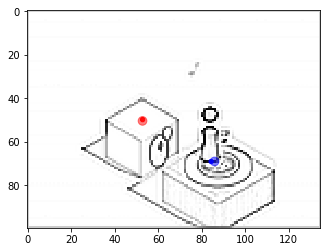

In [101]:
index=0
maxloss=-1
for i in range(len(loss)):
    if i in ban:
        continue
    if loss[i]>maxloss:
        maxloss = loss[i]
        index = i
print index
ban.append(index)
pre=model.predict(X_train[index].reshape(1,100,135,1))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.add_patch(Circle(xy = (y_train[index][0]*1080/resize_ratio,y_train[index][1]*800/resize_ratio), radius=1, alpha=0.9, color='red'))
ax.add_patch(Circle(xy = (y_train[index][2]*1080/resize_ratio,y_train[index][3]*800/resize_ratio), radius=1, alpha=0.9, color='blue'))
ax.add_patch(Circle(xy = (pre[0][0]*1080/resize_ratio,pre[0][1]*800/resize_ratio), radius=2, alpha=0.5, color='red'))
ax.add_patch(Circle(xy = (pre[0][2]*1080/resize_ratio,pre[0][3]*800/resize_ratio), radius=2, alpha=0.5, color='blue'))
ax.imshow(X_train[index].reshape(100,135),cmap='gray')
plt.show()

In [10]:
model.save('model.h5')

In [59]:
loss = model.evaluate(X_train[-10:], y_train[-10:])
print('test loss: ', loss)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 10 arrays: [array([[ 0.90588235,  0.90588235,  0.90588235, ...,  0.90588235,
         0.90588235,  0.90588235],
       [ 0.90196078,  0.99215686,  0.99215686, ...,  0.99215686,
         0.99215686,  0.90196078],...